<a href="https://colab.research.google.com/github/Vinitladse/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/YES_BANK_STOCK_CLOSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting** **to see how that impacted the stock prices of the company and whether Time series models** **or any other predictive models can do justice to such situations. This dataset has monthly** **stock prices of the bank since its inception and includes closing, starting, highest, and lowest** **stock prices of every month. The main objective is to predict the stock’s closing price of the** **month.**

In [1]:
# Importing The Libraries
import pandas as pd
import numpy as np
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
# Importing the dataset
Dataset = pd.read_csv("/content/drive/MyDrive/dataset/data_YesBank_StockPrices.csv")

# **Data Inspection**

In [4]:
# Here showing in Dataset the Upper rows by using head() method 
Dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
# Here showing in Dataset the Last Five rows by using tail() method
Dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


There are multiple variable in the dataset - Date, Open, High
and close 

-The columns Open and Close represent the starting and final price.   
           High, Low are represent the maximum and minimum.
          
  

In [7]:
# Find out the size of the play store data csv by using shape function
Dataset.shape

(185, 5)

Dataset we have 185 rows and 5 column

In [8]:
list(Dataset.columns)

['Date', 'Open', 'High', 'Low', 'Close']

In [9]:
Dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# **Data Cleaning**

In [10]:
Dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No missing values in dataset

In [11]:

len(Dataset[Dataset.duplicated()])

0

In [12]:
# required the changing data type of date 
# Here converted tha data type of integer into Datetime using the string parse time 
from datetime import datetime
Dataset['Date'] = Dataset['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [13]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


# **Checking the Outlier**

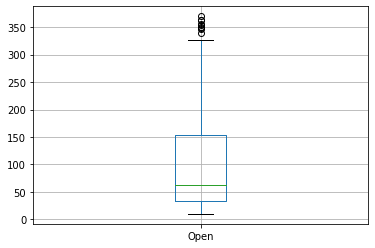

In [14]:
Dataset.boxplot('Open')

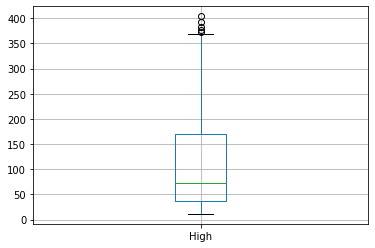

In [15]:
Dataset.boxplot('High')

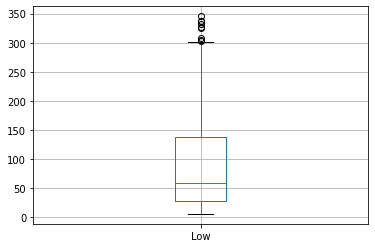

In [16]:
Dataset.boxplot('Low')

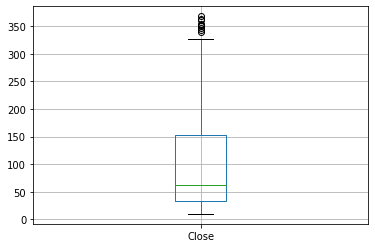

In [17]:
Dataset.boxplot('Close')

# **Exploratory Data Analysis**

**Dependent variable of close price of stock**

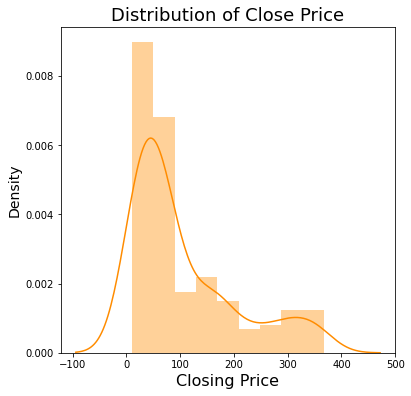

In [18]:
# depndent variable is 'Close'
# Normal Distribution

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Close'], color = 'DarkOrange')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It is Right Skewed Distirbution

Log Transformation :- Transform the response variable from y to log(y)

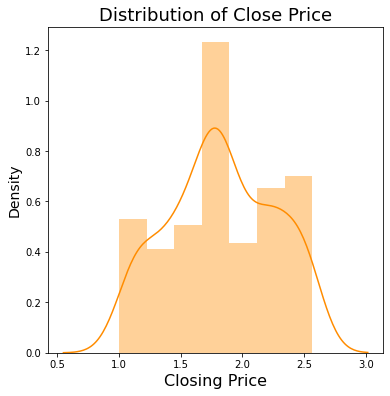

In [19]:
# Distribution plot of closing price For applying log transformation

plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Close']), color = 'DarkOrange')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


**Independent Variable Open , High and Low price of stock**

**Plotting distribution for numerical Features**





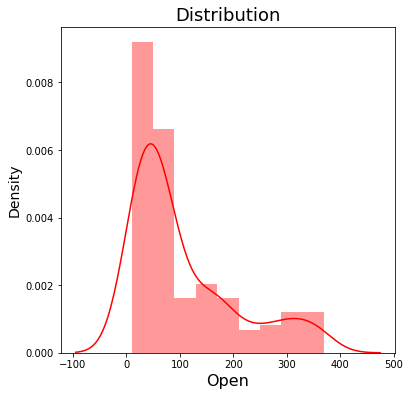

In [20]:
# ploting for Distribution of 'open' Feature

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Open'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

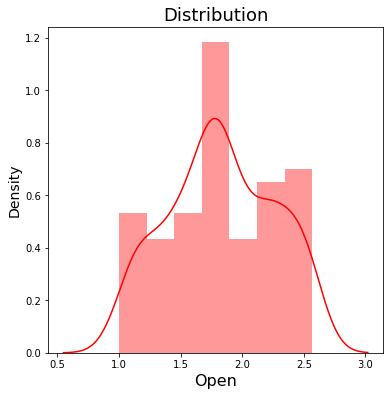

In [21]:
# log transformation for 'open' feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Open']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of open Feature

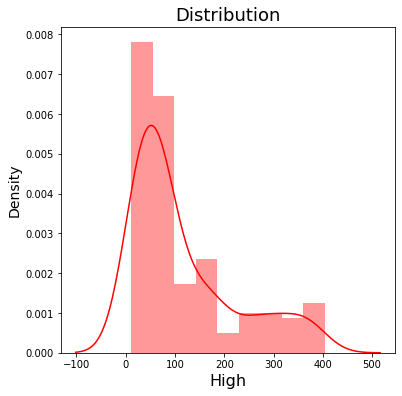

In [22]:
# ploting for Distribution of 'high' Feature

plt.figure(figsize = (6,6))
sns.distplot(Dataset['High'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks for numerical features are rightly skewed.

Apply log transformation to make normal. 

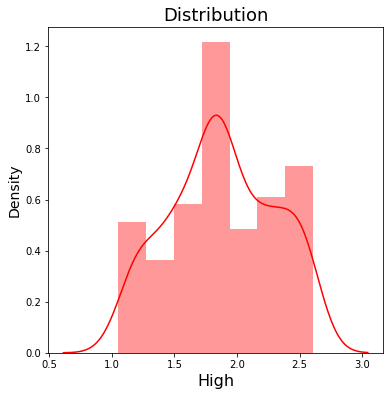

In [23]:
# Log Transformation of 'High' Feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['High']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of High Feature

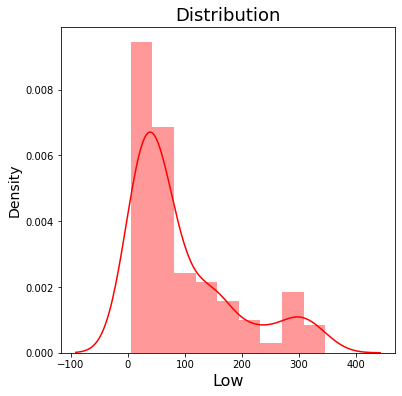

In [24]:
# for Normal Distribution
# ploting for Distribution of 'Low' Feature

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Low'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

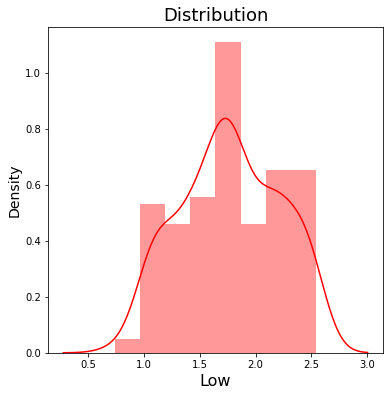

In [25]:
# Log Transformation of 'low' feature 
plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of Low Feature

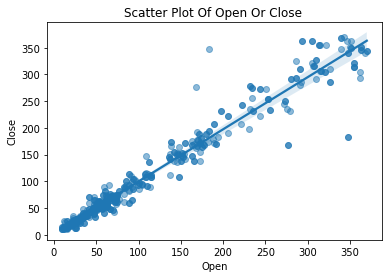

In [26]:
# Now find out the realation between the Dependent Variable and independent Variable
# scatter plot with Best Fit line

plt.scatter(Dataset['Close'], Dataset['Open'], alpha=0.5)
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= Dataset)
plt.show()

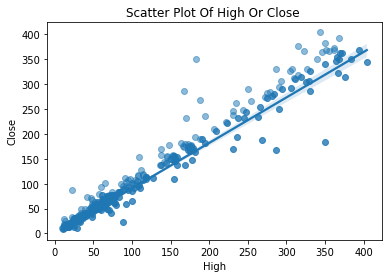

In [27]:
plt.scatter(Dataset['Close'], Dataset['High'], alpha=0.5)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= Dataset)
plt.show()

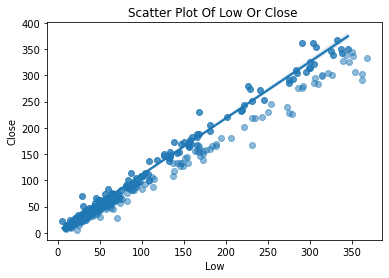

In [28]:
plt.scatter(Dataset['Close'], Dataset['Low'], alpha=0.5)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= Dataset)
plt.show()

# **Correlation**

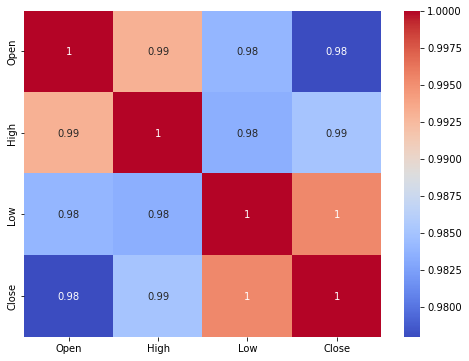

In [29]:
# let's find out correlation with Heatmap
# correlation
plt.figure(figsize=(8,6))
correlation = Dataset.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')

In [30]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)


In [31]:
cal_vif(Dataset[[i for i in Dataset.describe().columns if i not in ['Date', 'Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


We have the very High VIF of Open, High, Low fetures in our dataset so we have to drop them which is least correlated with dependent variable

In [32]:
# Here we will drop the open feature from the VIF matrix
cal_vif(Dataset[[i for i in Dataset.describe().columns if i not in ['Date', 'Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


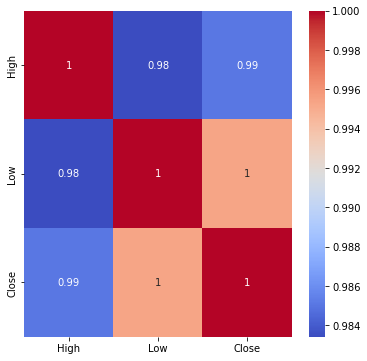

In [33]:
# after drop the oepn feture from the VIF matrix
# Correaltion of heatmap

plt.figure(figsize=(6,6))
sns.heatmap(Dataset[['High','Low','Close']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

# **Train Test Split**

Splitting Data

X = Independent Variable

y = Dependent Variable

In [34]:
from scipy.stats import zscore
X = Dataset.drop(columns=['Date', 'Close']).apply(zscore)

In [35]:
y = np.log10(Dataset['Close'])

In [49]:
# splitting the dadaset into the training set and test set 
# splitting the Train test data with 80 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)


In [50]:
# Shape of the Training dataset
print(X_train.shape)

(148, 3)


In [51]:
# Shape of the Test dataset
print(X_test.shape)

(37, 3)


In [52]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regression**

In [54]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [61]:
#train accuracy of linear regression model
round(regressor.score(X_train,y_train), 4)

0.8147

In [62]:
# Test accuracy of linear regression model
round(regressor.score(X_test, y_test), 4)

0.8226

In [58]:
#prediction of test data
y_pred = regressor.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [63]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [64]:
# creating the DataFrame of test and train Dataset
train_Dataset = pd.DataFrame(X_train,y_train)
test_Dataset = pd.DataFrame(10**y_test)
test_Dataset.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [66]:
test_Dataset['Predicted Closing Price']= 10**y_pred
test_Dataset.head()

,Actual Closing Price,Predicted Closing Price
16,25.32,32.914467
179,25.60,34.050099
66,52.59,43.170817
40,12.26,29.880891
166,147.95,103.446210


**Evaluation Of Linear Regression**

In [67]:
# Test Performance of Linear Regregression

print("MSE :", round(mean_squared_error(y_test, y_pred), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred)), 4)) 
print("MAE :", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE :", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("r2 :", round(r2_score(y_test, y_pred),4))

MSE : 0.0316
RMSE : 0.1777
MAE : 0.1513
MAPE : 0.0954
r2 : 0.8226


Text(0, 0.5, 'Predicted test value')

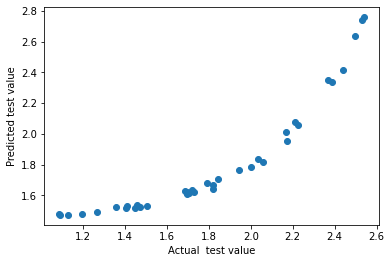

In [69]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual  test value')
plt.ylabel('Predicted test value')

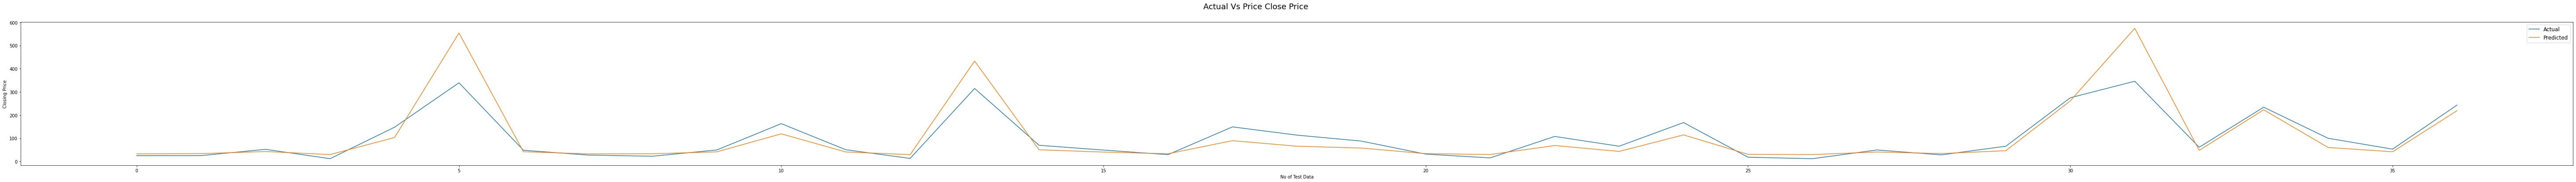

In [77]:
# Actual Price vs predicted price for Linear Regression plot
plt.figure(figsize=(10,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs Price Close Price', fontsize = 18)
plt.legend(['Actual', 'Predicted'], fontsize = 12)
plt.xlabel('No of Test Data', fontsize= 10)
plt.ylabel('Closing Price', fontsize= 10)
plt.show()

# **Implementing Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, max_iter = 3000)
lasso.fit(X_train, y_train) 

In [ ]:
round(lasso.score(X_train, y_train), 4)

In [ ]:
y_pred_lasso = lasso.predict(X_test)

In [ ]:
y_pred_lasso

# **Evalaution**